In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
gender=["M","F","M","F","M","F","M","F","M","F","M"]
clas = ["a","b",np.nan,"a","b","c","a",np.nan,"c",np.nan,"b"]
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14,np.nan,6])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3,7,9])
V3 = np.array([np.NaN,130,59,160,120,75,np.NaN,100,150,125,np.nan])
dept = ["HR","IT","IT","HR","IT",np.nan,"HR","IT",np.nan,"HR","IT"]
df = pd.DataFrame({
         "gender": gender,
          "class": clas,
          "var1" : V1,
          "var2" : V2,
         "salary": V3,
         "dept"  : dept   })
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [2]:
df.isnull().sum()  # hür sütunda var olan NaN değerleri yazar.

gender    0
class     3
var1      3
var2      3
salary    3
dept      2
dtype: int64

In [3]:
type(np.nan)

float

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  11 non-null     object 
 1   class   8 non-null      object 
 2   var1    8 non-null      float64
 3   var2    8 non-null      float64
 4   salary  8 non-null      float64
 5   dept    9 non-null      object 
dtypes: float64(3), object(3)
memory usage: 656.0+ bytes


In [5]:
np.empty(3) #Return a new array of given shape and type, without initializing entries.

array([4.e-323, 4.e-323, 4.e-323])

In [6]:
df.dropna()    #Remove missing values.

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [7]:
df.isnull().sum() / len(df)

gender    0.000000
class     0.272727
var1      0.272727
var2      0.272727
salary    0.272727
dept      0.181818
dtype: float64

In [8]:
df.salary.isnull().sum()

3

In [9]:
df.isnull().any()  
#Returns False unless there is at least one element within a series or along a Dataframe axis that is True or equivalent (e.g. non-zero or non-empty).

gender    False
class      True
var1       True
var2       True
salary     True
dept       True
dtype: bool

In [10]:
df.isnull().all()   #Return whether all elements are True, potentially over an axis.
#Returns True unless there at least one element within a series or along a Dataframe axis that is False or equivalent (e.g. zero or empty).

gender    False
class     False
var1      False
var2      False
salary    False
dept      False
dtype: bool

In [11]:
df.isnull().any(axis=1)

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
dtype: bool

In [12]:
df[df.isnull().any(axis=1)]  # sadece içinde en az bir NaN olanları getirir.

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR
10,M,b,6.0,9.0,NaN,IT


In [13]:
df[~(df.isnull().any(axis=1))]  # başına ~ koyunca sadece NaN olmayanları getirir.

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [14]:
df["salary"].fillna(2000)

0     2000.0
1      130.0
2       59.0
3      160.0
4      120.0
5       75.0
6     2000.0
7      100.0
8      150.0
9      125.0
10    2000.0
Name: salary, dtype: float64

In [15]:
df["salary"].fillna(df["salary"].mean())   #df.salary.fillna(df.salary.mean())

0     114.875
1     130.000
2      59.000
3     160.000
4     120.000
5      75.000
6     114.875
7     100.000
8     150.000
9     125.000
10    114.875
Name: salary, dtype: float64

In [16]:
sal = df["salary"].mean()
df["salary"].fillna( sal  )

0     114.875
1     130.000
2      59.000
3     160.000
4     120.000
5      75.000
6     114.875
7     100.000
8     150.000
9     125.000
10    114.875
Name: salary, dtype: float64

In [17]:
sal = df["salary"].median()
df["salary"].fillna( sal  )

0     122.5
1     130.0
2      59.0
3     160.0
4     120.0
5      75.0
6     122.5
7     100.0
8     150.0
9     125.0
10    122.5
Name: salary, dtype: float64

In [18]:
df[df.salary=="NaN"]

,gender,class,var1,var2,salary,dept


In [19]:
df[df.salary==np.NaN]

,gender,class,var1,var2,salary,dept


In [25]:
df[df.salary.isnull()] = -1
df

,gender,class,var1,var2,salary,dept
0,-1,-1,-1.0,-1.0,-1.0,-1
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,-1,-1,-1.0,-1.0,-1.0,-1
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [20]:
df[df.salary.isnull()]


,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
6,M,a,NaN,NaN,NaN,HR
10,M,b,6.0,9.0,NaN,IT


In [21]:
df.loc[ [0,6,10] , "salary"]

0    NaN
6    NaN
10   NaN
Name: salary, dtype: float64

In [31]:
df.loc[ df.salary.isnull() , "salary"] = -111
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,-111.0,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,-111.0,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [33]:
df.loc[ df.salary.isnull() , "salary"] = df.salary.mean()
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,NaN,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,NaN,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,NaN,75.000,NaN
6,M,a,NaN,NaN,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,NaN,7.0,125.000,HR


In [22]:
df.fillna({"class": "other" ,
           "var1": df.var1.mean() , 
           "var2": df.var2.median() , 
           "dept": df.dept.mode([0])   # bimodal bir yapıda olabileceğinden dolayı 
          })

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,7.5,130.0,IT
2,M,other,5.0,5.0,59.0,IT
3,F,a,6.0,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,7.5,75.0,NaN
6,M,a,6.0,7.5,NaN,HR
7,F,other,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,other,6.0,7.0,125.0,HR


In [23]:
df.dept.mode()

0    IT
dtype: object

In [24]:
df["class"].mode()  

0    a
1    b
dtype: object

In [25]:
df.notna()

,gender,class,var1,var2,salary,dept
0,True,True,True,True,False,True
1,True,True,True,False,True,True
2,True,False,True,True,True,True
3,True,True,False,True,True,True
4,True,True,True,True,True,True
5,True,True,True,False,True,False
6,True,True,False,False,False,True
7,True,False,True,True,True,True
8,True,True,True,True,True,False
9,True,False,False,True,True,True


In [26]:
df.where(df.notna(), df.median(), axis=1 )

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,122.5,HR
1,F,b,3.0,7.5,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,5.5,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,7.5,75.0,NaN
6,M,a,5.5,7.5,122.5,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,5.5,7.0,125.0,HR


In [28]:
df.loc[[0,6,7,10], "salary"] = np.nan
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,NaN,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [29]:
df.groupby(["gender","dept"])[["salary"]].mean()

salary
gender dept        
F      HR     142.5
       IT     130.0
M      HR       NaN
       IT      89.5

In [30]:
df.groupby(["dept"])[["salary"]].mean()

,salary
dept,
HR,142.5
IT,103.0


In [34]:
df.salary.fillna(df.groupby(["dept"])["salary"].transform("mean"), inplace=True)
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,142.5,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,142.5,HR
7,F,NaN,10.0,2.0,103.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [37]:
df["class"].fillna( df["class"].mode()[0],inplace=True)
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,142.5,HR
1,F,b,3.0,NaN,130.0,IT
2,M,a,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,142.5,HR
7,F,a,10.0,2.0,103.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,a,NaN,7.0,125.0,HR


In [39]:
df.groupby(["gender"])["var1"].mean()

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [40]:
df.var1.fillna(df.groupby(["gender"])["var1"].transform("mean"), inplace=True)
df

,gender,class,var1,var2,salary,dept
0,M,a,2.000000,8.0,142.5,HR
1,F,b,3.000000,NaN,130.0,IT
2,M,a,5.000000,5.0,59.0,IT
3,F,a,4.666667,8.0,160.0,HR
4,M,b,7.000000,11.0,120.0,IT
5,F,c,1.000000,NaN,75.0,NaN
6,M,a,6.800000,NaN,142.5,HR
7,F,a,10.000000,2.0,103.0,IT
8,M,c,14.000000,3.0,150.0,NaN
9,F,a,4.666667,7.0,125.0,HR


In [41]:
df.groupby(["gender"])["var1"].transform("mean")   # transform olunca satır satır okuyor.

0     6.800000
1     4.666667
2     6.800000
3     4.666667
4     6.800000
5     4.666667
6     6.800000
7     4.666667
8     6.800000
9     4.666667
10    6.800000
Name: var1, dtype: float64

In [44]:
df.groupby(["gender"])["var1"].apply(lambda x : x.mean())  # apply ile yapınca görüldüğü gibi 2 değer veriyor bunlara ortalama değerleri atıyor.

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [50]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<AxesSubplot:>

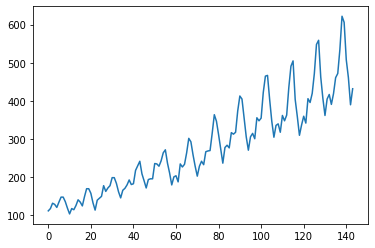

In [51]:
flights.passengers.plot()

In [46]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [53]:
np.random.seed(101)
flights.loc[np.random.randint(0,144,30) , "passengers"] = np.nan
flights

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,132.0
3,1949,Apr,129.0
4,1949,May,121.0
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,NaN
141,1960,Oct,461.0
142,1960,Nov,390.0


<AxesSubplot:>

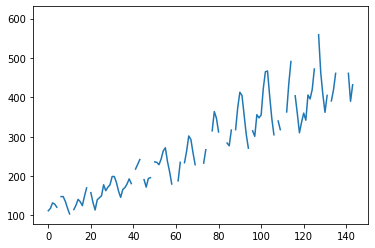

In [54]:
flights.passengers.plot()

In [55]:
flights.isnull().sum()   # 30 sayı içinde 3 tanesi birbirinin aynısı çıktığından dolayı nan olanlar 

year           0
month          0
passengers    27
dtype: int64

In [56]:
flights.passengers.fillna(method="bfill")   #backfill. ilk satır nan ise geri.

0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
139    606.0
140    461.0
141    461.0
142    390.0
143    432.0
Name: passengers, Length: 144, dtype: float64

In [57]:
flights.passengers.fillna(method="ffill")   # frontfill. son satır nan ise ileri.

0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
139    606.0
140    606.0
141    461.0
142    390.0
143    432.0
Name: passengers, Length: 144, dtype: float64

<AxesSubplot:>

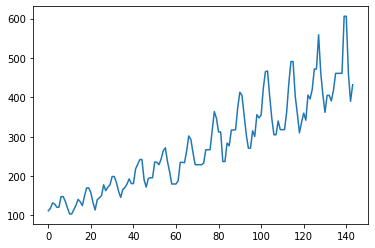

In [58]:
flights.passengers.fillna(method="ffill").plot()

In [59]:
flights.passengers.interpolate()

0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
139    606.0
140    533.5
141    461.0
142    390.0
143    432.0
Name: passengers, Length: 144, dtype: float64

In [61]:
np.linspace(129,135,3)

array([129., 132., 135.])

In [62]:
np.linspace(112,132,5)

array([112., 117., 122., 127., 132.])

<AxesSubplot:>

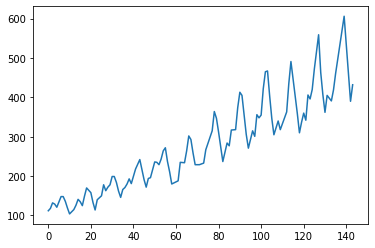

In [63]:
flights.passengers.interpolate().plot()

In [67]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [69]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:>

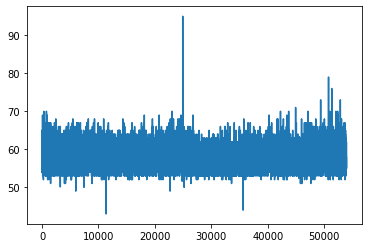

In [70]:
df.table.plot()

<AxesSubplot:>

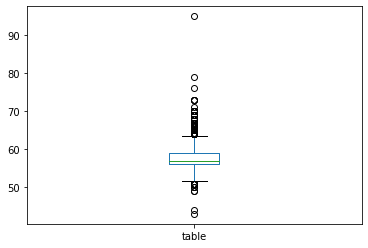

In [71]:
df.table.plot(kind="box")

<AxesSubplot:xlabel='table'>

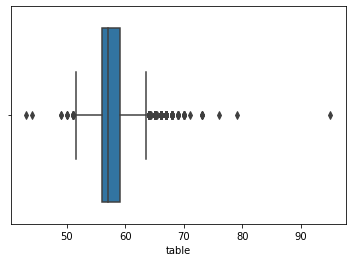

In [72]:
sns.boxplot(x=df.table)

In [73]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [74]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [76]:
Q1 = df_table.quantile(0.25)
Q1

56.0

In [77]:
Q3 = df_table.quantile(0.75)
Q3

59.0

In [78]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
IQR

3.0

In [81]:
lower_lim = Q1 - (1.5*IQR)
lower_lim

51.5

In [82]:
upper_lim = Q3 + (1.5*IQR)
upper_lim

63.5

In [88]:
(df_table > upper_lim).value_counts()

False    53351
True       589
Name: table, dtype: int64

In [89]:
(df_table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [93]:
not_outlier = (df_table >= lower_lim) & (df_table <= upper_lim)
not_outlier

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [95]:
df_drop_outlier = df[not_outlier]
df_drop_outlier

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [96]:
df[ ~((df_table >= lower_lim) & (df_table <= upper_lim))]  # outlier olanları çektik.

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [101]:
df_table.loc[ df_table > upper_lim ] = upper_lim
df_table

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [100]:
df_table.loc[ df_table < lower_lim ] = lower_lim
df_table

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<AxesSubplot:xlabel='table'>

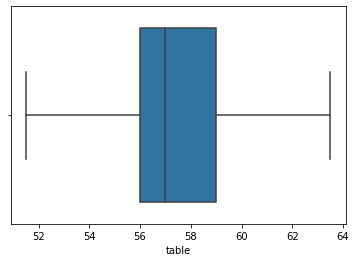

In [99]:
sns.boxplot(x = df_table)

<AxesSubplot:xlabel='table', ylabel='Count'>

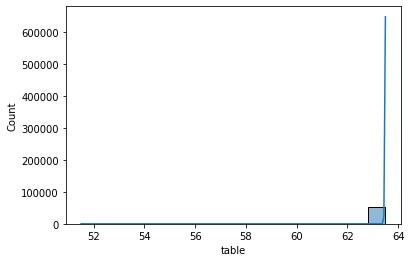

In [103]:
sns.histplot(x = df_table, kde=True)

In [102]:
df.loc[ df.table > lower_lim, "table"] = upper_lim
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,63.5,326,3.95,3.98,2.43
1,0.21,59.8,63.5,326,3.89,3.84,2.31
2,0.23,56.9,63.5,327,4.05,4.07,2.31
3,0.29,62.4,63.5,334,4.20,4.23,2.63
4,0.31,63.3,63.5,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,63.5,2757,5.75,5.76,3.50
53936,0.72,63.1,63.5,2757,5.69,5.75,3.61
53937,0.70,62.8,63.5,2757,5.66,5.68,3.56
53938,0.86,61.0,63.5,2757,6.15,6.12,3.74


In [104]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
# df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [111]:
from scipy.stats.mstats import winsorize
df_win = winsorize(df.table, (0.01,0.01))  # burada benim sağda 589 tane solda 16 tane outlier vardı. Tüm verinin 0.01 yani 539 taneyi max eşitledi. kalan fark ise sağda outlier olarak kaldı.
df_win.sort()       # soldakilerin sayısı az olduğundan hepsini min eşitleyip geçti. 
df_win

masked_array(data=[53., 53., 53., ..., 64., 64., 64.],
             mask=False,
       fill_value=1e+20)

In [113]:
len(df[df.table < lower_lim]) / len(df)  # bu değerleri yukarıda parantez içine yazıyoruz.

0.00029662588060808305

In [115]:
len(df[df.table > upper_lim]) / len(df)

0.010919540229885057

<AxesSubplot:>

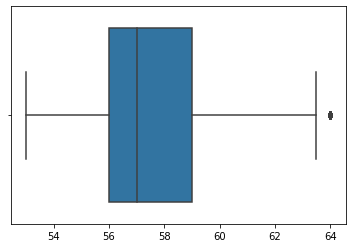

In [108]:
sns.boxplot( x =df_win)

<AxesSubplot:xlabel='table'>

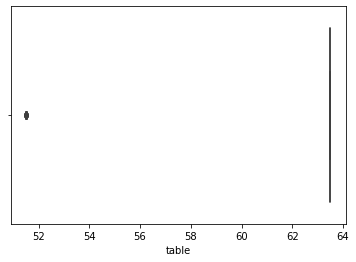

In [109]:
sns.boxplot(x = df_table)

# LOG

<AxesSubplot:ylabel='Frequency'>

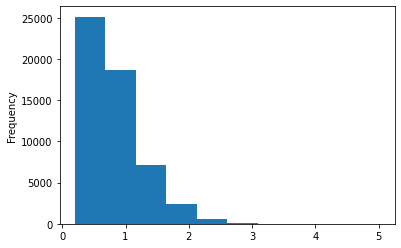

In [116]:
df.carat.plot(kind="hist")  # verinin boxplot bakmadan önce histogram ve displot bakmak gerekir.

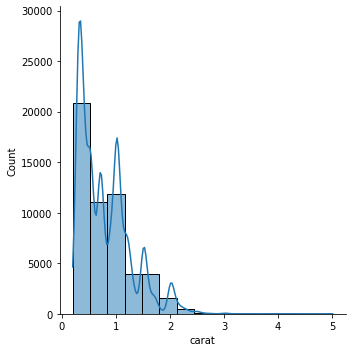

In [119]:
sns.displot(df.carat, bins = 15, kde = True )

<AxesSubplot:xlabel='carat'>

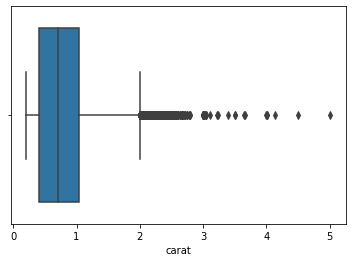

In [118]:
sns.boxplot(x = df.carat)

In [122]:
df["log_carat"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,log_carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


<AxesSubplot:xlabel='log_carat'>

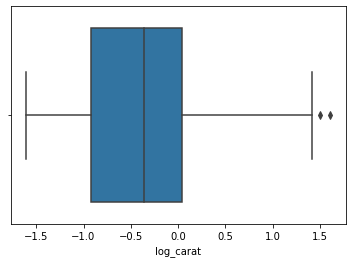

In [123]:
sns.boxplot(x = df.log_carat)

<AxesSubplot:xlabel='log_carat', ylabel='Count'>

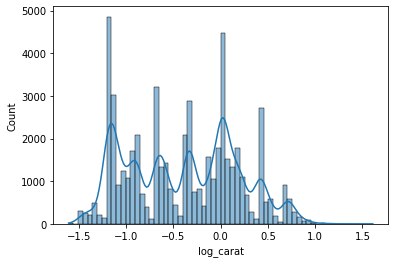

In [124]:
sns.histplot(x = df.log_carat, kde= True)

In [125]:
df_carat_log = df.log_carat
Q1_log = df_carat_log.quantile(0.25)
Q3_log = df_carat_log.quantile(0.75)
IQR_log = Q3_log-Q1_log
IQR_log

0.9555114450274363

In [126]:
lower_lim_log = Q1_log - 1.5 * IQR_log
upper_lim_log = Q3_log + 1.5 * IQR_log

In [127]:
df.loc[df.log_carat > upper_lim_log,"log_carat"] = upper_lim_log
df

,carat,depth,table,price,x,y,z,log_carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


<AxesSubplot:xlabel='log_carat'>

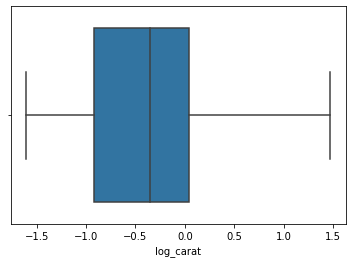

In [128]:
sns.boxplot( x= df.log_carat)